# Fetching Data


In [ ]:
import os
import tarfile
import urllib.request

In [ ]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/atlas25git/ML_FinalSolution/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

##Calling fetch_housing_data(): 
it creates a datasets/housing directory in
your workspace, downloads the housing.tgz file, and extracts the housing.csv file from
it in this directory

In [ ]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
  os.makedirs(housing_path, exist_ok=True)
  tgz_path = os.path.join(housing_path, "housing.tgz")
  urllib.request.urlretrieve(housing_url, tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path=housing_path)
  housing_tgz.close()

In [ ]:
fetch_housing_data()

# Loading DATA

In [ ]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
  csv_path = os.path.join(housing_path, "housing.csv")
  return pd.read_csv(csv_path)

In [ ]:
housing_data = load_housing_data()

DataFrame’s head() method gives top 5 rows


In [ ]:
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


total_bedrooms attribute has only 20,433 nonnull values, meaning that 207 districts are missing
this feature.

In [ ]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


All attributes are numerical, except the ocean_proximity field. Its type is object, so it
could hold any kind of Python object
CSV file,
you know that it must be a text attribute.
ocean_proximity column were repetitive,
which means that it is probably a categorical attribute

In [ ]:
housing_data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Let’s look at the other fields. The describe() method shows a summary of the
numerical attributes

In [ ]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#Plotting Histogram

A histogram displays numerical data by grouping data into "bins" of equal width. Each bin is plotted as a bar whose height corresponds to how many data points are in that bin. Bins are also sometimes called "intervals", "classes", or "buckets".

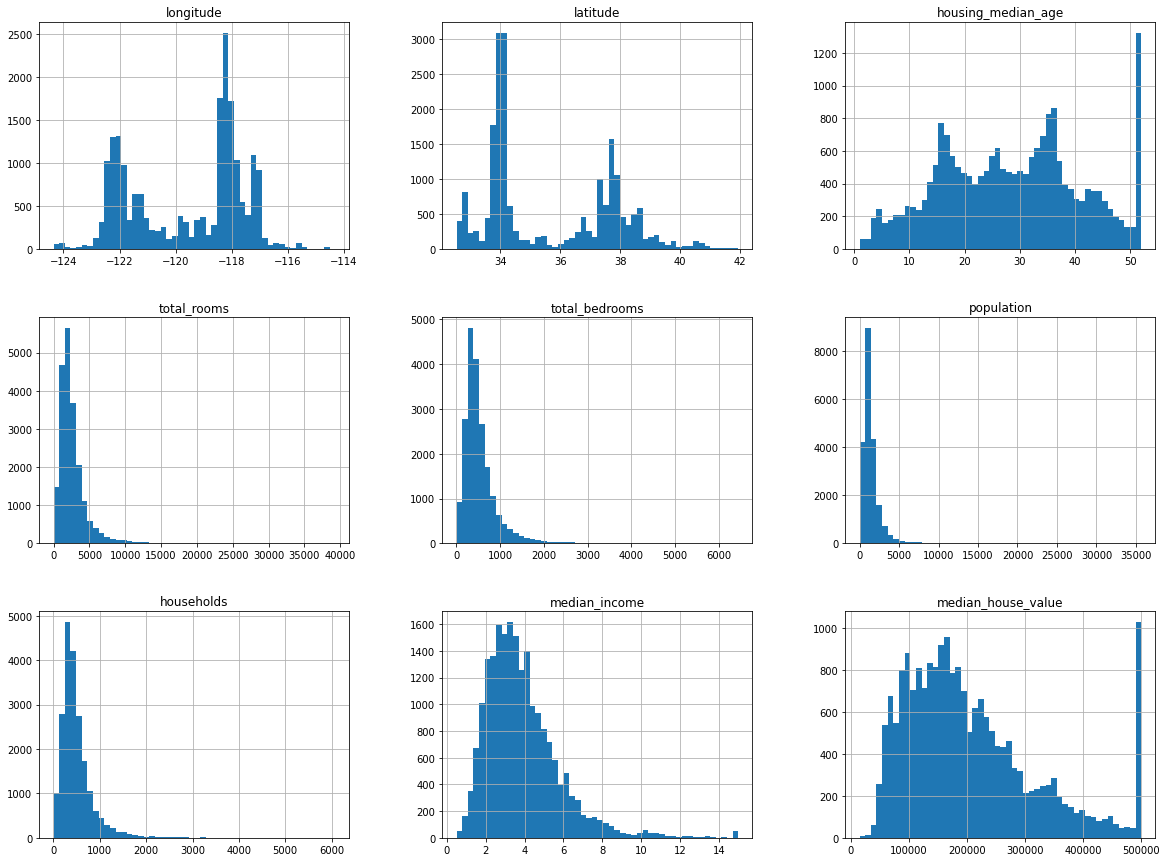

In [ ]:
import matplotlib.pyplot as plt

housing_data.hist(bins=50,figsize=(20,15))
plt.show()

There are a few things you might notice in these histograms:


First, the median income attribute does not look like it is expressed in US dollars
(USD). After checking with the team that collected the data, you are told that the
data has been scaled and capped at 15 (actually, 15.0001) for higher median
incomes, and at 0.5 (actually, 0.4999) for lower median incomes.

The housing median age and the median house value were also capped.

These attributes have very different scales

Finally, many histograms are tail-heavy: they extend much farther to the right of
the median than to the left. This may make it a bit harder for some Machine
Learning algorithms to detect patterns.

# Creating Test Data



Parameters:	
x : int or array_like
If x is an integer, randomly permute np.arange(x). If x is an array, make a copy and shuffle the elements randomly.

Returns:	
out : ndarray
Permuted sequence or array range.

In [ ]:
import numpy as np

def split_train_test(data, test_ratio):
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data)*test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:] #[lowerboud:upperbound]
  return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
train_set, test_set = split_train_test(housing_data,0.2)

In [ ]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
15238,-117.30,32.96,30.0,1226.0,205.0,380.0,151.0,4.2875,500001.0,NEAR OCEAN
18606,-122.13,37.15,39.0,2854.0,613.0,1338.0,518.0,3.9423,180300.0,NEAR OCEAN
2207,-119.86,36.81,4.0,4530.0,1070.0,1804.0,837.0,3.3942,72100.0,INLAND
5270,-118.55,34.03,35.0,9075.0,1858.0,3646.0,1724.0,6.0307,500001.0,<1H OCEAN
19595,-120.89,37.59,33.0,1016.0,206.0,617.0,209.0,2.1510,195800.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
4891,-118.25,34.02,33.0,1676.0,525.0,2564.0,515.0,2.1957,100800.0,<1H OCEAN
15770,-122.44,37.76,38.0,2202.0,452.0,833.0,435.0,6.8939,455900.0,NEAR BAY
9614,-120.47,37.28,19.0,1548.0,319.0,1227.0,309.0,1.7756,73300.0,INLAND
2303,-119.76,36.83,22.0,2803.0,438.0,1234.0,457.0,4.5179,99600.0,INLAND


In [ ]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8724,-118.36,33.83,35.0,1378.0,247.0,645.0,217.0,5.9143,343400.0,<1H OCEAN
15807,-122.44,37.76,52.0,2110.0,454.0,816.0,438.0,3.9079,370000.0,NEAR BAY
13183,-117.70,33.92,4.0,8301.0,1333.0,3941.0,1236.0,6.2141,252200.0,<1H OCEAN
13379,-117.61,34.14,14.0,15809.0,2485.0,7363.0,2410.0,5.5198,245600.0,INLAND
9115,-118.21,34.64,16.0,2573.0,427.0,1273.0,426.0,5.9508,181100.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
9765,-121.62,36.43,20.0,1335.0,290.0,717.0,243.0,4.7891,230600.0,<1H OCEAN
8253,-118.17,33.77,36.0,2933.0,881.0,2077.0,838.0,2.2538,181300.0,NEAR OCEAN
7823,-118.13,33.90,38.0,1475.0,269.0,827.0,265.0,4.7663,191600.0,<1H OCEAN
13333,-117.66,34.04,10.0,3657.0,695.0,2079.0,663.0,4.2054,159900.0,INLAND


Well, this works, but it is not perfect: if you run the program again, it will generate a
different test set! Over time, you (or your Machine Learning algorithms) will get to
see the whole dataset, which is what you want to avoid.

Another option is to set the random number generator’s seed (e.g., with np.ran
dom.seed(42))14 before calling np.random.permutation() so that it always generates
the same shuffled indices.

But both these solutions will break the next time you fetch an updated dataset. To have a stable train/test split even after updating the dataset, 
## a common solution is to use each instance’s identifier to decide whether or not it should go in the test set
(assuming instances have a unique and immutable identifier). 
For example, you could
##compute a hash of each instance’s identifier and put that instance in the test set if the
##hash is lower than or equal to 20% of the maximum hash value. 

This ensures that the test set will remain consistent across multiple runs, even if you refresh the dataset.

The new test set will contain 20% of the new instances, but it will not contain any instance that was previously in the training set.

#Implementation

The function checks, whether one row of a DataFrame should belong to the test-set or the train-set. It does so, by expecting an identifier, which in this case is either the index-number of the row or some kind of unique id of the row, if present. The test_ratio defines the threshold for the choice. This approach can be used to make reproducible splits, because the crc32-checksum will return the same value, when the same identifier is passed. This behavior is not given, if you just choose to split the dataset randomly. Of course, one could set np.random.seed(42), but if the dataset changes, the algorithm chooses differently, even though the indices/ids weren't changed, but there were only instances appended.

In [ ]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
  return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
  ids = data[id_column]
  in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
  return data.loc[~in_test_set], data.loc[in_test_set]

Unfortunately, the housing dataset does not have an identifier column. The simplest
solution is to use the row index as the ID:

In [ ]:
housing_with_id = housing_data.reset_index() #adds index column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

If you use the row index as a unique identifier, you need to make sure that new data
gets appended to the end of the dataset and that no row ever gets deleted

Most stable features to build a unique identifier: district’s latitude and longitude are guaranteed to be stable for a few
million years, so you could combine them into an ID like so:

In [ ]:
housing_with_id["id"] = housing_data["longitude"]*1000 + housing_data["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id,0.2,"id")

Scikit-Learn provides a few functions to split datasets into multiple subsets in various
ways. The simplest function is train_test_split(), which does pretty much the
same thing as the function split_train_test(), with a couple of additional features.

#Stratified Sampling

Median income is a very
important attribute to predict median housing prices. You may want to ensure that
the test set is representative of the various categories of incomes in the whole dataset.

The following code uses the
pd.cut() function to create an income category attribute with five categories (labeled
from 1 to 5): category 1 ranges from 0 to 1.5 (i.e., less than $15,000), category 2 from
1.5 to 3, and so on:

In [ ]:
housing_data["income_category"] = pd.cut(housing_data["median_income"],
                                         bins=[0,1.5,3.0,4.5,6.,np.inf],
                                         labels=[1,2,3,4,5])

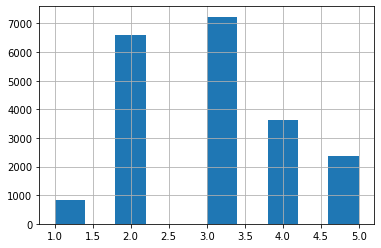

In [ ]:
housing_data["income_category"].hist()

#Stratified sampling based on the income category

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_data, housing_data["income_category"]):
  strat_train_set = housing_data.loc[train_index]
  strat_test_set = housing_data.loc[test_index]

In [ ]:
strat_test_set["income_category"].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_category, dtype: float64

the test set generated using stratified sampling has
income category proportions almost identical to those in the full dataset, whereas the
test set generated using purely random sampling is skewed.

## Removing Income category label

In [ ]:
for set_ in (strat_train_set , strat_test_set):
  set_.drop("income_category",axis=1,inplace=True)

# Exploring The Data

#Visualizing Geographical Data

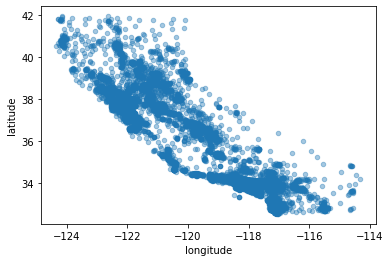

In [ ]:
housing_data.plot(kind="scatter", x="longitude", y="latitude",alpha=0.4)

## The radius of each circle represents the district’s population (option s), 

##The color represents the price (option c). 
We will use a predefined color map (option cmap) called jet, which ranges from blue (low values) to red (high prices)

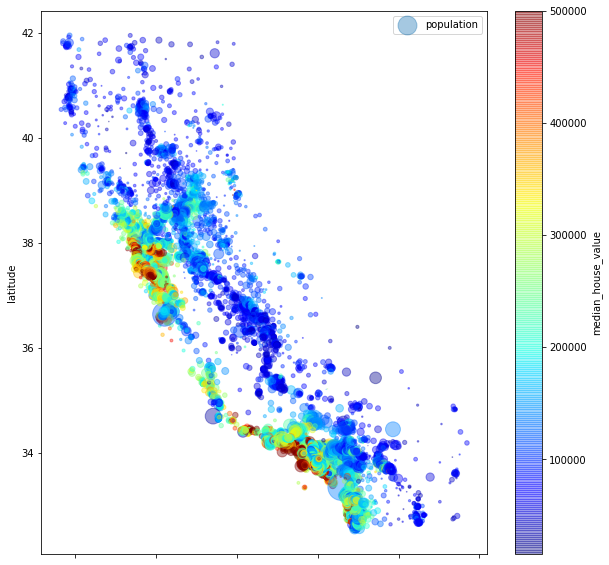

In [ ]:
housing_data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
                  s=housing_data["population"]/50, label="population", figsize=(10,10),
                  c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
                  )
plt.legend()

#Looking For Correlations

In [ ]:
corr_matrix = housing_data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

#Using Scatter Matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feef6bad2d0>,
      dtype=object)

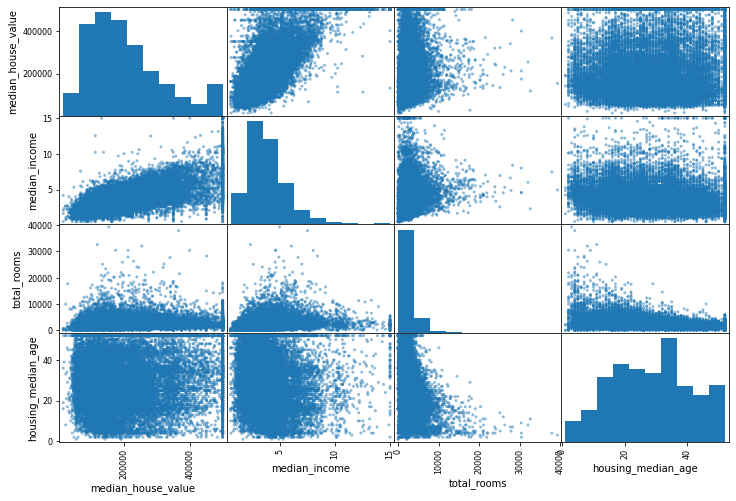

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
scatter_matrix(housing_data[attributes], figsize=(12, 8))

#Experimenting with Attribute Combinations

In [ ]:
housing_data["rooms_per_household"] = housing_data["total_rooms"]/housing_data["households"]
housing_data["bedrooms_per_room"] = housing_data["total_bedrooms"]/housing_data["total_rooms"]
housing_data["population_per_household"]=housing_data["population"]/housing_data["households"]

In [ ]:
corr_matrixN = housing_data.corr()
corr_matrixN["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

## The new bedrooms_per_room attribute is much more correlated with the median house value than the total number of rooms or bedrooms. Apparently houses with a lower bedroom/room ratio tend to be more expensive.

# Prepare the Data for Machine Learning Algorithms

But first let’s revert to a clean training set

In [ ]:
housing_data = strat_train_set.drop("median_house_value", axis=1)
housing_data_labels = strat_train_set["median_house_value"].copy()

#Data Cleaning

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

#Selecting the Numerical attributes

housing_data_num = housing_data.drop("ocean_proximity", axis=1)
imputer.fit(housing_data_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

#Applying imputing on data

In [ ]:
X = imputer.transform(housing_data_num)

This is a plain numpy array we need to convert it to dataframe

In [ ]:
housing_data_tr = pd.DataFrame(X, columns=housing_data_num.columns,
                          index=housing_data_num.index)

#Handling Text and Categorical Attributes

In [ ]:
housing_data_category = housing_data[["ocean_proximity"]]
housing_data_category.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


Scikit-Learn’s OrdinalEncoder class

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_data_category_enc = ordinal_encoder.fit_transform(housing_data_category)
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

ML algorithms will assume that two nearby
values are more similar than two distant values. This may be fine in some cases (e.g.,
for ordered categories such as “bad,” “average,” “good,” and “excellent”)

## Using OneHotEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_data_category)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

# Column Transformation (custom)

Although Scikit-Learn provides many useful transformers, you will need to write
your own for tasks such as custom cleanup operations or combining specific
attributes. 
You will want your transformer to work seamlessly with Scikit-Learn functionalities
(such as pipelines), and since Scikit-Learn relies on duck typing (not inheritance),

all you need to do is create a class and implement three methods: 

fit() (returning self), 

transform(), 

and fit_transform().

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  def __init__(self, add_bedrooms_per_room = True):
    self.add_bedrooms_per_room = add_bedrooms_per_room
  def fit(self,X,y=None):
    return self
  def transform(self, X):
    rooms_per_household = X[:,rooms_ix]/X[:,households_ix]
    population_per_household = X[:,population_ix]/X[:,households_ix]
    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:,bedrooms_ix]/X[:,rooms_ix]
      return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
    else:
      return np.c_[X,rooms_per_household,population_per_household]



In [ ]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing_data.values)

# Transformation Pipelines

there are many data transformation steps that need to be executed in
the right order. Fortunately, Scikit-Learn provides the Pipeline class to help with
such sequences of transformations. Here is a small pipeline for the numerical
attributes:

The Pipeline constructor takes a list of name/estimator pairs defining a sequence of
steps. All but the last estimator must be transformers (i.e., they must have a
fit_transform() method). The names can be anything you like (as long as they are
unique and don’t contain double underscores, __); they will come in handy later for
hyperparameter tuning.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
                         ('imputer', SimpleImputer(strategy="median")),
                         ('attribs_adder',CombinedAttributesAdder()),
                         ('std_scaler',StandardScaler()),
])

In [ ]:
housing_data_num_tr = num_pipeline.fit_transform(housing_data_num)

# Extending the Transformation to Categorical Labels

First we import the ColumnTransformer class, next we get the list of numerical column
names and the list of categorical column names,

 and then we construct a Colum
nTransformer. 

The constructor requires a list of tuples, where each tuple contains a
name,22 a transformer, and a list of names (or indices) of columns that the transformer
should be applied to.

In this example, we specify that the numerical columns
should be transformed using the num_pipeline that we defined earlier, and the categorical
columns should be transformed using a OneHotEncoder. Finally, we apply this
ColumnTransformer to the housing data: it applies each transformer to the appropriate
columns and concatenates the outputs along the second axis (the transformers
must return the same number of rows).

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_data_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
                                   ("num",num_pipeline, num_attribs),
                                   ("cat",OneHotEncoder(),cat_attribs),
])

In [ ]:
housing_data_prepared = full_pipeline.fit_transform(housing_data)

In [ ]:
housing_data_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

#Selecting and Training a Model


## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_data_prepared, housing_data_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Trying on random Instance

In [ ]:
some_data = housing_data.iloc[:5]
print(some_data)
some_labels = housing_data_labels.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)

print("Prediction:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

       longitude  latitude  ...  median_income  ocean_proximity
17606    -121.89     37.29  ...         2.7042        <1H OCEAN
18632    -121.93     37.05  ...         6.4214        <1H OCEAN
14650    -117.20     32.77  ...         2.8621       NEAR OCEAN
3230     -119.61     36.31  ...         1.8839           INLAND
3555     -118.59     34.23  ...         3.0347        <1H OCEAN

[5 rows x 9 columns]
Prediction: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


#RMSE on the whole training set

In [ ]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_data_prepared)
lin_mse = mean_squared_error(housing_data_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

Conclusin: This is better than nothing, but clearly not a great score: most districts’ median_hous
ing_values range between $120,000 and $265,000, so a typical prediction error of
$68,628 is not very satisfying.

#DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_data_prepared,housing_data_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

#Evaluation

In [ ]:
housing_predictions = tree_reg.predict(housing_data_prepared)
tree_mse = mean_squared_error(housing_data_labels, housing_predictions)
tree_rmse  = np.sqrt(tree_mse)
tree_rmse

0.0

likely that the model has badly overfit the data

# Better Evaluation Using Cross-Validation

The following
code randomly splits the training set into 10 distinct subsets called folds, then it
trains and evaluates the Decision Tree model 10 times, picking a different fold for
evaluation every time and training on the other 9 folds. The result is an array containing
the 10 evaluation scores:

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg,housing_data_prepared, housing_data_labels,
                         scoring="neg_mean_squared_error",cv=10)
tree_rmse_score = np.sqrt(-scores)

Scikit-Learn’s cross-validation features expect a utility function
(greater is better) rather than a cost function (lower is better), so
the scoring function is actually the opposite of the MSE (i.e., a negative
value), which is why the preceding code computes -scores
before calculating the square root.

In [ ]:
def display_scores(scores):
  print("Scores:",scores)
  print("Mean:",scores.mean())
  print("Standard deviation:",scores.std())

In [ ]:
display_scores(tree_rmse_score)

Scores: [69186.20558067 67637.11701146 71529.76986132 68788.70884793
 71906.66170544 73825.57467514 70787.11253605 71913.48192979
 77923.08638605 69525.52947819]
Mean: 71302.32480120334
Standard deviation: 2804.35661838524


Conclusin:
Now the Decision Tree doesn’t look as good as it did earlier. In fact, it seems to perform
worse than the Linear Regression model! Notice that cross-validation allows
you to get not only an estimate of the performance of your model, but also a measure
of how precise this estimate is (i.e., its standard deviation). The Decision Tree has a
score of approximately 71,407, generally ±2,439. You would not have this information
if you just used one validation set. But cross-validation comes at the cost of training
the model several times, so it is not always possible

#K-Fold cross valiidation for regression

In [ ]:
lin_scores = cross_val_score(lin_reg,housing_data_prepared, housing_data_labels,
                             scoring="neg_mean_squared_error",cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.674001798344


Decision Tree model is overfitting so badly that it performs worse
than the Linear Regression model.

# RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_data_prepared,housing_data_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
forest_rmse = cross_val_score(forest_reg,housing_data_prepared, housing_data_labels,
                             scoring="neg_mean_squared_error",cv=10)

KeyboardInterrupt: ignored

In [ ]:
display_scores(forest_rmse)

You should save every model you experiment with so that you can
come back easily to any model you want. Make sure you save both
the hyperparameters and the trained parameters, as well as the
cross-validation scores and perhaps the actual predictions as well.
This will allow you to easily compare scores across model types,
and compare the types of errors they make. You can easily save
Scikit-Learn models by using Python’s pickle module or by using
the joblib library, which is more efficient at serializing large
NumPy arrays (you can install this library using pip):

In [ ]:
!pip install pickle5

In [ ]:
import joblib as joblib
joblib.dump(forest_reg,"forest_reg.pkl")

['forest_reg.pkl']

#FineTuning

## Grid Search

following code searches for the best combination
of hyperparameter values for the RandomForestRegressor:

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
              {
                  'n_estimators':[3,10,30],'max_features':[2,4,6,8]
              },
              {
                  'bootstrap': [False], 'n_estimators': [3,10], 'max_features':[2,3,4]
              },
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg,param_grid,cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_data_prepared, housing_data_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

When you have no idea what value a hyperparameter should have,
a simple approach is to try out consecutive powers of 10 (or a
smaller number if you want a more fine-grained search, as shown
in this example with the n_estimators hyperparameter).

In [ ]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
  print(np.sqrt(-mean_score),params)

64276.83293750751 {'max_features': 2, 'n_estimators': 3}
55875.98439457043 {'max_features': 2, 'n_estimators': 10}
52813.12606653481 {'max_features': 2, 'n_estimators': 30}
60715.64041373321 {'max_features': 4, 'n_estimators': 3}
52822.273742316625 {'max_features': 4, 'n_estimators': 10}
50652.48320835735 {'max_features': 4, 'n_estimators': 30}
59302.60458620357 {'max_features': 6, 'n_estimators': 3}
52122.216723812206 {'max_features': 6, 'n_estimators': 10}
50209.299616290555 {'max_features': 6, 'n_estimators': 30}
59703.78579120769 {'max_features': 8, 'n_estimators': 3}
52679.230400477136 {'max_features': 8, 'n_estimators': 10}
50108.72459432226 {'max_features': 8, 'n_estimators': 30}
62113.376143137255 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54153.83321766281 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60762.261437219044 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52497.84449005585 {'bootstrap': False, 'max_features': 3, 'n_estimator

We got a better value than the ones we had got on default values, hence we've fine tuned our model.

Don’t forget that you can treat some of the data preparation steps as
hyperparameters. For example, the grid search will automatically
find out whether or not to add a feature you were not sure about
(e.g., using the add_bedrooms_per_room hyperparameter of your
CombinedAttributesAdder transformer). It may similarly be used
to automatically find the best way to handle outliers, missing features,
feature selection, and more.

# Randomized Search
when the hyperparameter search space is large, it is
often preferable to use RandomizedSearchCV instead. This class can be used in much
the same way as the GridSearchCV class, but instead of trying out all possible combinations,
it evaluates a given number of random combinations by selecting a random
value for each hyperparameter at every iteration.

If you let the randomized search run for, say, 1,000 iterations, this approach will
explore 1,000 different values for each hyperparameter (instead of just a few values
per hyperparameter with the grid search approach).
• Simply by setting the number of iterations, you have more control over the computing
budget you want to allocate to hyperparameter search.

#Analyze the Best Models and Their Errors

Analyzing the best one yet which was random forest

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.58990267e-02, 6.16550810e-02, 4.54395113e-02, 1.61557495e-02,
       1.55505441e-02, 1.60780862e-02, 1.37018244e-02, 3.77497524e-01,
       4.46802478e-02, 1.12602633e-01, 6.80824739e-02, 9.78380648e-03,
       1.47531609e-01, 8.99530213e-05, 1.94150299e-03, 3.31042638e-03])

In [ ]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances,attributes),reverse=True)

[(0.37749752410126003, 'median_income'),
 (0.1475316092041931, 'INLAND'),
 (0.11260263296282216, 'pop_per_hhold'),
 (0.0680824738554759, 'bedrooms_per_room'),
 (0.06589902665827596, 'longitude'),
 (0.06165508101936554, 'latitude'),
 (0.04543951126894334, 'housing_median_age'),
 (0.04468024779814955, 'rooms_per_hhold'),
 (0.016155749455851777, 'total_rooms'),
 (0.016078086236822314, 'population'),
 (0.015550544146987953, 'total_bedrooms'),
 (0.013701824420555517, 'households'),
 (0.009783806481757154, '<1H OCEAN'),
 (0.0033104263785971215, 'NEAR OCEAN'),
 (0.001941502989635098, 'NEAR BAY'),
 (8.995302130759573e-05, 'ISLAND')]

Conclusion: With this information, you may want to try dropping some of the less useful features
(e.g., apparently only one ocean_proximity category is really useful, so you could try
dropping the others).

#Evaluate Your System on the Test Set

In [ ]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value",axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
joblib.dump(final_model,"FineTunedFinalRFT.pkl")

['FineTunedFinalRFT.pkl']

In [ ]:
final_rmse

48213.17106129579

what if it is just 0.1% better than the model currently
in production? You might want to have an idea of how precise this estimate is.
For this, you can compute a 95% confidence interval for the generalization erro

In [ ]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,
                         loc=squared_errors.mean(),scale=stats.sem(squared_errors)))

array([46193.62841848, 50151.45482543])

#Project Report

Conclusion: In this California
housing example, the final performance of the system is not better than the
experts’ price estimates, which were often off by about 20%, but it may still be a good
idea to launch it, especially if this frees up some time for the experts so they can work
on more interesting and productive tasks.